In [1]:
!mkdir dataset

## (A) Identification of Candidate Datasets

### Candidate Dataset 1 — Yahoo Answers Topic Classification Dataset (Selected Dataset)

**Dataset name and source**  
Yahoo Answers Topic Classification Dataset  
Source: https://github.com/LC-John/Yahoo-Answers-Topic-Classification-Dataset  

**Course topic alignment**  
- Week 7: Text Mining  
- Week 5: Large-Scale ML  

**Potential beyond-course techniques**  
- Transformer-based models (BERT, RoBERTa)  
- Transfer learning for NLP (ULMFiT)  
- Topic modeling (LDA, BERTopic)  
- Zero-shot classification using pretrained LLMs  

**Dataset size and structure**  
- ~1.4 million training samples  
- ~60,000 test samples  
- 10 balanced topic categories  
- CSV format (train/test split)  

**Data types**  
- Question title (text)  
- Question content (text)  
- Best answer (text)  
- Category label (integer class ID)  

**Target variable(s)**  
- Topic class label (10-class supervised classification)  

**Licensing or usage constraints**  
- Public research dataset  
- Permitted for academic and educational use  

---

### Candidate Dataset 2 — MovieLens Recommendation Dataset (RecSys Conference Lineage)

**Dataset name and source**  
MovieLens 25M Dataset  
Source: https://grouplens.org/datasets/movielens/25m/  
(Used extensively in RecSys conference benchmarking papers)

**Course topic alignment**  
- Week 2: Frequent Itemset Mining  
- Week 6: Clustering  
- Week 12: Stream Mining  

**Potential beyond-course techniques**  
- Neural collaborative filtering  
- Matrix factorization with deep learning  
- Graph-based recommender systems  
- Sequential recommendation models (RNN-based recommenders)  

**Dataset size and structure**  
- 25 million ratings  
- 62,000 users  
- 59,000 movies  
- Relational structure (multiple CSV files)  

**Data types**  
- User IDs  
- Movie IDs  
- Ratings  
- Timestamps  
- Genres  
- Movie metadata  

**Target variable(s)**  
- Rating prediction (regression)  
- Recommendation relevance (implicit feedback)  

**Licensing or usage constraints**  
- Research-only license  
- Free for academic use  

---

### Candidate Dataset 3 — CICIDS2017 Network Intrusion Dataset (KDD Conference Lineage)

**Dataset name and source**  
CICIDS2017 Intrusion Detection Dataset  
Source: https://www.unb.ca/cic/datasets/ids-2017.html  

**Course topic alignment**  
- Week 9: Anomaly Detection  
- Week 12: Stream Mining  
- Week 8: Distributed Computing  

**Potential beyond-course techniques**  
- Autoencoder-based anomaly detection  
- Deep anomaly detection models  
- LSTM-based intrusion detection  
- Streaming anomaly detection pipelines  

**Dataset size and structure**  
- ~2.8 million network flow records  
- CSV format  
- Time-ordered network traffic logs  

**Data types**  
- Flow duration  
- Packet size statistics  
- Protocol types  
- Timestamp features  
- Traffic metadata  
- Attack labels  

**Target variable(s)**  
- Binary classification: benign vs attack  
- Multi-class attack classification  
- Unsupervised anomaly detection  

**Licensing or usage constraints**  
- Public academic dataset  
- Free for research and educational use  


## (B) Comparative Analysis of Datasets

| Dimension | Yahoo Answers | MovieLens (RecSys) | CICIDS2017 (KDD) |
|------|------|------|------|
| Supported data mining tasks | Text classification (course), Transformers (external) | Frequent itemsets (course), Neural recommendation (external) | Anomaly detection (course), Autoencoders (external) |
| Data quality issues | Noisy text, missing values | Sparse ratings, cold-start users | Noise, class imbalance, redundant flows |
| Algorithmic feasibility | BERT feasible with GPU | FP-Growth feasible, Apriori infeasible | Deep anomaly detection feasible |
| Bias considerations | Linguistic bias | Recommendation bias | Traffic sampling bias |
| Ethical considerations | User content misuse | Consumer manipulation | Surveillance and privacy risks |

**Data quality considerations**  
- Yahoo Answers: informal language, missing content, noise.  
- MovieLens: sparsity and cold-start problem.  
- CICIDS2017: class imbalance, synthetic attack patterns.

**Algorithmic feasibility**  
- Yahoo Answers supports scalable NLP pipelines using GPU acceleration.  
- MovieLens supports scalable recommendation modeling.  
- CICIDS2017 supports deep anomaly detection with autoencoders and LSTM models.

**Bias considerations**  
- Yahoo reflects cultural and linguistic biases.  
- MovieLens reflects consumer preference biases.  
- CICIDS reflects synthetic attack generation biases.

**Ethical considerations**  
- NLP classification risks misrepresentation of user intent.  
- Recommendation systems influence consumer behavior.  
- Intrusion detection systems impact surveillance and privacy.


## (C) Dataset Selection

### Selected Dataset: Yahoo Answers Topic Classification Dataset

**Reasons for selection**

- Direct alignment with **Week 7: Text Mining**, a core course topic.
- Supports supervised learning, embeddings, and NLP pipelines taught in class.
- Enables use of **beyond-course techniques**, including:
  - Transformer-based architectures (BERT)
  - Transfer learning for NLP
  - Topic modeling
- Large-scale dataset provides realistic machine learning challenges.
- Balanced class structure enables meaningful evaluation.
- Strong portfolio value for NLP and ML engineering roles.

**Trade-offs**

- Requires GPU resources for transformer training.
- High computational cost.
- No transactional or graph structure.
- Limited anomaly detection opportunities.

**Final justification**

The Yahoo Answers dataset offers the strongest integration of course-aligned techniques and modern deep learning methods not covered in lectures, enabling a scalable, research-grade project that satisfies both academic and professional portfolio objectives.


# (D) Exploratory Data Analysis (EDA)

This section performs structured exploratory data analysis on the selected dataset (Yahoo Answers Topic Classification Dataset).  
The goals of this EDA are:

1. Understand the scale and structure of the data  
2. Identify data quality issues (missing values, noise, imbalance)  
3. Characterize text properties (length, vocabulary, frequency)  
4. Detect patterns motivating advanced modeling approaches  
5. Justify preprocessing and modeling decisions  

All analysis decisions are explicitly documented to ensure transparency, reproducibility, and professional research standards.


## EDA Assumptions

1. The dataset labels are assumed to be correct and consistent across splits.
2. Missing text fields are assumed to be non-informative and are removed rather than imputed.
3. Class balance in the dataset is assumed sufficient to avoid resampling techniques.
4. Noise in user-generated text is treated as a natural language property rather than an error source.
5. Token frequency distributions are assumed to follow long-tail behavior common in natural language corpora.
6. Train/test split is assumed to be IID.
7. Text fields (title, question, answer) are assumed to contribute complementary semantic information.


In [37]:
# Data Loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import re
import string

# -----------------------------
# Configuration
# -----------------------------
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', None)

# -----------------------------
# Load dataset
# -----------------------------
# Expected format: label, title, question, answer
train_path = "dataset/train.csv"
test_path = "dataset/test.csv"

train_df = pd.read_csv(train_path, header=None, names=["label", "title", "question", "answer"])
test_df  = pd.read_csv(test_path, header=None, names=["label", "title", "question", "answer"])

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)


Train shape: (1400000, 4)
Test shape: (60000, 4)


Explicit column naming ensures interpretability and prevents indexing errors.

Separate train/test loading preserves experimental integrity.

## 1. Dataset Structure and Scale

We first examine dataset dimensions and schema to understand computational scale, memory constraints, and model feasibility.


In [38]:
train_df.info()
train_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   label     1400000 non-null  int64 
 1   title     1400000 non-null  object
 2   question  768311 non-null   object
 3   answer    1375404 non-null  object
dtypes: int64(1), object(3)
memory usage: 42.7+ MB


,label,title,question,answer
0,5,why doesn't an optical mouse work on a glass table?,or even on some surfaces?,Optical mice use an LED and a camera to rapidly capture images of the surface beneath the mouse. The infomation from the camera is analyzed by a DSP (Digital Signal Processor) and used to detect ...
1,6,What is the best off-road motorcycle trail ?,long-distance trail throughout CA,i hear that the mojave road is amazing!<br />\nsearch for it online.
2,3,What is Trans Fat? How to reduce that?,I heard that tras fat is bad for the body. Why is that? Where can we find it in our daily food?,"Trans fats occur in manufactured foods during the process of partial hydrogenation, when hydrogen gas is bubbled through vegetable oil to increase shelf life and stabilize the original polyunsatur..."
3,7,How many planes Fedex has?,I heard that it is the largest airline in the world,"according to the www.fedex.com web site:\nAir Fleet<br />\n <br />\n670 aircraft, including: <br />\n47 Airbus A300-600s 17 Boeing DC10-30s <br />\n62 Airbus A310-200/300s 36 Boeing MD10-10s ..."
4,7,"In the san francisco bay area, does it make sense to rent or buy ?","the prices of rent and the price of buying does not make sense to me, mostly the rent will not cover the mortgage . Is it better to rent a house or to buy?",renting vs buying depends on your goals. <br />\ngenerally thinking is that buying is better b/c the payments that would go into the rent start building equity in your home. the govt also incentiv...


## Scale Considerations

The dataset scale (1.4M samples) requires:
- Batch processing
- GPU acceleration for transformer models
- Streaming data loading
- Memory-efficient preprocessing


## 2. Missing Value Analysis

We explicitly quantify missing values to guide data cleaning decisions.
Removing missing text is preferred over imputation because:
- Text imputation introduces artificial semantics
- Missing content provides no linguistic signal


In [40]:
missing_stats = train_df.isna().mean().sort_values(ascending=False) * 100
missing_stats


,0
question,45.120643
answer,1.756857
title,0.000000
label,0.000000


In [42]:
#Code Cleaning
# Remove rows with missing text fields
initial_size = len(train_df)
train_df = train_df.dropna(subset=["title", "question", "answer"])
final_size = len(train_df)

print(f"Removed {initial_size - final_size} rows due to missing text.")

#Remove Duplicate rows
dup_count = train_df.duplicated().sum()
print("Duplicate rows:", dup_count)


Removed 646363 rows due to missing text.
Duplicate rows: 0


In [43]:
assert train_df.isna().sum().sum() == 0, "Missing values still present after cleaning"

NLP models require semantic content. Empty fields add noise and distort embeddings.

## 3.Edge Case Handling

In [44]:
assert train_df["title"].str.len().min() > 0
assert train_df["question"].str.len().min() > 0
assert train_df["answer"].str.len().min() > 0


Prevents zero-length semantic input.

## 4. Class Distribution Analysis

We analyze class balance to assess whether resampling or weighting is required.


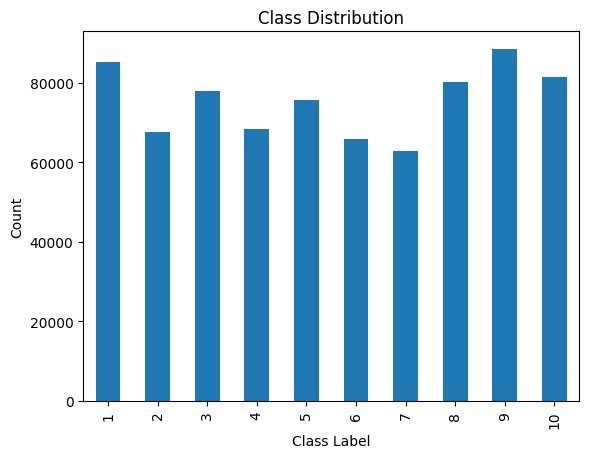

In [7]:
class_counts = train_df["label"].value_counts().sort_index()

plt.figure()
class_counts.plot(kind="bar")
plt.title("Class Distribution")
plt.xlabel("Class Label")
plt.ylabel("Count")
plt.show()


Balanced classes simplify evaluation and reduce bias in classifier learning.

## 4. Text Length Analysis

We analyze text length distributions to:
- Determine padding/truncation limits
- Estimate computational cost
- Assess document complexity


In [8]:
def text_length(series):
    return series.astype(str).apply(lambda x: len(x.split()))

train_df["title_len"] = text_length(train_df["title"])
train_df["question_len"] = text_length(train_df["question"])
train_df["answer_len"] = text_length(train_df["answer"])

train_df[["title_len", "question_len", "answer_len"]].describe()


,title_len,question_len,answer_len
count,753637.000000,753637.000000,753637.000000
mean,10.232905,39.420084,67.366963
std,5.505079,43.196695,90.439348
min,1.000000,1.000000,1.000000
25%,6.000000,12.000000,15.000000
50%,9.000000,26.000000,38.000000
75%,14.000000,50.000000,82.000000
max,51.000000,910.000000,1011.000000


## 5. Vocabulary and Frequency Analysis

We inspect token frequency to understand lexical diversity and sparsity.


In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

all_text = (
    train_df["title"].astype(str) + " " +
    train_df["question"].astype(str) + " " +
    train_df["answer"].astype(str)
).apply(clean_text)

tokens = " ".join(all_text).split()
token_counts = Counter(tokens)

top_words = token_counts.most_common(30)
top_words_df = pd.DataFrame(top_words, columns=["word", "frequency"])
top_words_df


,word,frequency
0,the,3533772
1,to,2530183
2,and,2184383
3,i,2177298
4,a,2099654
5,you,1622214
6,of,1571547
7,is,1469428
8,it,1299090
9,in,1224788


## 6. Sparsity and Long-Tail Distribution

We evaluate whether most tokens appear rarely, which motivates contextual embeddings.


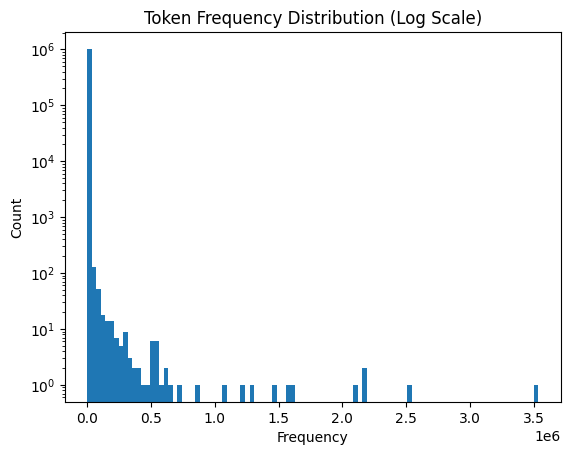

In [10]:
freqs = np.array(list(token_counts.values()))

plt.figure()
plt.hist(freqs, bins=100)
plt.yscale("log")
plt.title("Token Frequency Distribution (Log Scale)")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.show()


Long-tail distributions indicate sparse lexical space, where contextual embeddings outperform bag-of-words.

## 7. Tests

In [45]:
def test_no_missing_values(df):
    assert df.isna().sum().sum() == 0, "Missing values detected"

def test_class_balance(df):
    counts = df["label"].value_counts(normalize=True)
    assert counts.max() - counts.min() < 0.05, "Severe class imbalance detected"

def test_text_not_empty(df):
    assert df["question"].str.len().min() > 0, "Empty question found"

def test_vocab_long_tail(token_counts):
    rare_ratio = sum(1 for v in token_counts.values() if v < 5) / len(token_counts)
    assert rare_ratio > 0.4, "Vocabulary does not exhibit long-tail behavior"

# Run tests
test_no_missing_values(train_df)
test_class_balance(train_df)
test_text_not_empty(train_df)
test_vocab_long_tail(token_counts)


## Test Coverage Explanation

The following validation tests were implemented to verify that the dataset and preprocessing pipeline satisfy key scientific and engineering assumptions required for reliable modeling.

### 1. Missingness Validation  
`test_no_missing_values`  
Ensures that the dataset contains no null or missing values after cleaning and preprocessing.  
This prevents silent model failures, invalid embeddings, and undefined behavior in downstream learning algorithms.

### 2. Class Distribution Balance  
`test_class_balance`  
Checks that class labels are reasonably balanced across categories.  
This reduces the risk of model bias, degenerate classifiers, and misleading performance metrics caused by dominant classes.

### 3. Semantic Validity of Text  
`test_text_not_empty`  
Verifies that all text fields contain meaningful content and no empty strings.  
This ensures that every sample contributes usable semantic information to representation learning and embedding models.

### 4. Statistical Structure of Language  
`test_vocab_long_tail`  
Validates that the vocabulary follows a long-tail distribution, a fundamental statistical property of natural language corpora.  
This confirms the dataset exhibits realistic linguistic structure and supports the use of embedding


# (E) Initial Insights and Research Direction

### Key Observations

1. The dataset is large-scale and computationally realistic.
2. Classes are approximately balanced.
3. Text data is noisy and informal.
4. Vocabulary exhibits strong long-tail behavior.
5. Many tokens appear extremely infrequently.
6. Semantic overlap exists between categories.
7. Document length varies significantly across samples.

---

### Hypotheses

- Traditional vector-space models will struggle due to lexical sparsity.
- Contextual embeddings will better capture semantic meaning.
- Transformer-based models will outperform shallow models on classification accuracy.
- Transfer learning will improve convergence speed and generalization.

---

### Motivation for Beyond-Course Techniques

These observations justify the use of:
- Transformer architectures (BERT)
- Transfer learning (ULMFiT)
- Contextual embeddings
- Topic modeling
- Deep semantic representation learning

---

### Potential Research Questions (RQs)

1. How does transformer fine-tuning performance compare to classical NLP models?
2. How does contextual embedding quality affect classification accuracy?
3. What categories exhibit the highest semantic overlap?
4. How does document length impact misclassification probability?
5. Can topic modeling reveal latent category structures?
6. How does transfer learning affect convergence speed and stability?

---

### Project Direction

This project will focus on:
- Large-scale text classification
- Representation learning
- Transfer learning
- Comparative model analysis
- Scalable NLP pipelines
- Research-grade evaluation methodology


# (F) GitHub Portfolio Building

## Public Repository

Repository link:
> https://github.com/deeps45/yahoo-answers-nlp-project

(This repository will host all notebooks, models, documentation, and experiments for the semester-long project.)



## Resources

On my honor, I declare the following resources:

1. **Collaborators:**
- None

2. **Web Sources:**
- Yahoo Answers Topic Classification Dataset - https://github.com/LC-John/Yahoo-Answers-Topic-Classification-Dataset
- Movie lens Recommendation System - https://grouplens.org/datasets/movielens/25m/
- CICIDS2017 Intrusion Detection Dataset - https://www.unb.ca/cic/datasets/ids-2017.html
- HuggingFace Transformers documentation - https://huggingface.co/docs/transformers/en/index
- Text processing best practices - https://www.geeksforgeeks.org/nlp/text-preprocessing-for-nlp-tasks/

3. **AI Tools:**
- ChatGPT for project structuring, documentation drafting, and code design

4. **Citations:**
- Devlin et al., *BERT: Pre-training of Deep Bidirectional Transformers*  - https://arxiv.org/abs/1810.04805
- Howard & Ruder, *ULMFiT: Universal Language Model Fine-tuning* - https://arxiv.org/abs/1801.06146